In [1]:
%matplotlib inline
%precision 16
from __future__ import print_function
import numpy
import matplotlib.pyplot as plt

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

# HW 1:  Forms of Error



## Question 1

Consider the expression
$$
    f(x) = \frac{1}{x - 1}
$$

**(a)** (5) Expand $f(x)$ in a Taylor series representation about $x_0 = 0$.

$$
\begin{align}
f &= \frac{1}{x-1} \\
f' &= -\frac{1}{(x-1)^2} \\
f'' &= \frac{2}{(x-1)^3} \\
f''' &= -\frac{6}{(x-1)^4}
\end{align}
$$

$$
\begin{align}
f(0) &= -1 \\
f(0)' &= -1 \\
f(0)'' &= -2 \\
f(0)''' &= -6
\end{align} 
$$

From here it is clear that the derivative term will always cancel the factorial to -1, so we have series
$$
\begin{align}
f(x) = -1 - x - x^2 - x^3 ... \\
f(x) = \sum_{n=0}^\infty -x^n	
\end{align}
$$

**(b)** (5) What is the expected operation count if we truncate the series to $N$ terms?  Simplify the power to multiplications rather than something more exotic.  Stating the answer in terms of big-O notation is fine.

$$
\mathcal{O}(x^N)
$$

**(c)** (10) Make two plots of the relative error of the approximation vs. the true value of the function.  In the first pick a value to evaluate both functions at keeping $x_0 \neq x$ but vary the number of terms you keep ($N$).  In the second fix $N$ and vary $x$.  Explain what you observe.  

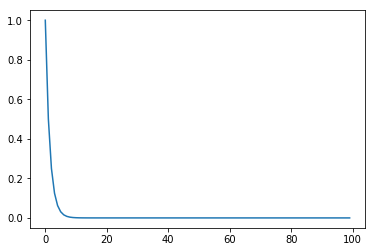

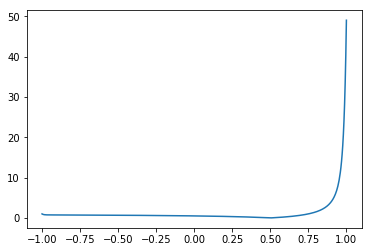

In [8]:
x = 0.5
true_val = 1 / (x - 1)
N_vals = list(range(100))
approx_vals = []
for N in N_vals:
   approx_vals.append(sum([-x**n for n in range(N)]))
error = numpy.abs(numpy.array(approx_vals) - true_val) / numpy.abs(true_val)

plt.figure()
plt.plot(N_vals, error)
    
    
N = 100
x_vals = numpy.linspace(-1, 1, 500)
approx_vals = []
for x in x_vals:
    approx_vals.append(sum([-x**n for n in range(N)]))

error = numpy.abs(numpy.array(approx_vals) - true_val) / numpy.abs(true_val)
plt.figure()
plt.plot(x_vals, error)
    

## Question 2

**(a)** (10)  Write a Python program to compute

$$S_N = \sum^N_{n=1} \left [ \frac{1}{n} - \frac{1}{n+1} \right ] = \sum^N_{n=1} \frac{1}{n (n + 1)}$$

once using the first summation and once using the second for $N = 10, 10^2, \ldots , 10^7$.

In [26]:
def sum_1(N):
    """Compute the summation S_N defined as
    
    \sum^N_{n=1} \left [ \frac{1}{n} - \frac{1}{n+1} \right ]
    
    :Input:
     *N* (int) The upper bound on the summation.
    
    Returns Sn (float)
    """

    return sum([(1 / n) - (1 / (n + 1)) for n in range(1, N + 1)])


def sum_2(N):
    """Compute the summation S_N defined as
    
    \sum^N_{n=1} \frac{1}{n (n + 1)}
    
    :Input:
     *N* (int) The upper bound on the summation.
    
    Returns Sn (float)
    """
    return sum([1 / (n *(n + 1)) for n in range(1, N + 1)])


In [27]:
N = numpy.array([10**n for n in range(1,8)])
answer = numpy.zeros((2, N.shape[0]))
for (n, upper_bound) in enumerate(N):
    answer[0, n] = sum_1(upper_bound)
    answer[1, n] = sum_2(upper_bound)
numpy.testing.assert_allclose(answer[0, :], numpy.array([0.9090909090909089, 0.9900990099009896, 
                                                         0.9990009990009996, 0.9999000099990004, 
                                                         0.9999900001000117, 0.9999990000010469,
                                                         0.9999998999998143]), atol=1e-10)
numpy.testing.assert_allclose(answer[1, :], numpy.array([0.9090909090909091, 0.9900990099009898, 
                                                         0.9990009990009997, 0.9999000099990007, 
                                                         0.9999900001000122, 0.9999990000010476, 
                                                         0.9999998999998153]), atol=1e-10)
print("Success!")

Success!


**(b)** (5) Compute the absolute error between the two summation approaches.

In [28]:
def abs_error(N):
    """Compute the absolute error of the two sums defined as
    
    \sum^N_{n=1} \left [ \frac{1}{n} - \frac{1}{n+1} \right ]
    
    and 
    
    \sum^N_{n=1} \frac{1}{n (n + 1)}
    
    respectively for the given N.
    
    :Input:
     *N* (int) The upper bound on the summation.
    
    Returns *error* (float)
    """
    
    return abs(sum_1 - sum_2)

In [30]:
N = numpy.array([10**n for n in xrange(1,8)])
answer = numpy.zeros(N.shape)
for (n, upper_bound) in enumerate(N):
    answer[n] = abs_error(upper_bound)
numpy.testing.assert_allclose(answer, numpy.zeros(answer.shape), atol=1e-10)
print("Success!")

NameError: name 'xrange' is not defined

**(c)** (10) Plot the relative and absolute error versus $N$ up to large $N$ (above at least $10^4$).  Also plot a line where $\epsilon_{\text{machine}}$ should be.  Comment on what you see.

In [ ]:
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2)

# HINT!  Use the plotting function semilogx to plot the errors
#        Also, do not forget to label your plot

# INSERT CODE HERE
raise NotImplementedError("Replace this statement with your solution.")

plt.show()

**(d)** (5) Theorize what may have lead to the differences in answers.

## Question 3

Following our discussion in lecture regarding approximating $e^x$ again consider the Taylor polynomial approximation:

$$e^x \approx T_n(x) = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \cdots + \frac{x^n}{n!}$$

**(a)** (10) Derive the upper bound on the *relative error* $r_n$ assuming that $0 < x$ and

$$r_n = \frac{|e^x - T_n(x)|}{|e^x|}$$

is given by

$$r_n \leq \left | \frac{x^{n+1}}{(n + 1)!} \right |$$

**(b)** (10) Analytically show that for large $x$ and $n$, $r_n \leq \epsilon_{\text{machine}}$ implies that we need at least $n > e \cdot x$ terms in the series (where $e = \text{exp}(1)$).

*Hint* Use Stirling's approximation $log (n!) \approx n~log~n - n$.

**(c)** (5) Write a Python function that accurately computes $T_n$ to the specified relative error tolerance and returns both the estimate on the range and the number of terms in the series needed over the interval $[-2, 2]$.  Note that the testing tolerance will be $8 \cdot \epsilon_{\text{machine}}$.

Make sure to document your code including expected inputs, outputs, and assumptions being made.

In [ ]:
# HINT: Think about how we evaluated polynomials efficiently in class

import scipy.misc as misc

def Tn_exp(x, tolerance=1e-3):

    MAX_N = 100
    
    # INSERT CODE HERE
    raise NotImplementedError("Replace this statement with your solution.")
    
    return Tn, N

In [ ]:
x = numpy.linspace(-2, 2, 100)
tolerance = 8.0 * numpy.finfo(float).eps
answer, N = Tn_exp(x, tolerance=tolerance)
assert(numpy.all(numpy.abs(answer - numpy.exp(x)) / numpy.abs(numpy.exp(x)) < tolerance))
print("Success!")

## Question 4

(5) Given the Taylor polynomial expansions

$$\frac{1}{1-\Delta x} = 1 + \Delta x + \Delta x^2 + \Delta x^3 + \mathcal{O}(\Delta x^4)$$

and

$$\sinh \Delta x = ...$$

$$\cosh \Delta x = 1 - \frac{\Delta x^2}{2!} + \frac{\Delta x^4}{4!} + \mathcal{O}(\Delta x^6)$$

determine the order of approximation for their sum and product (determine the exponent that belongs in the $\mathcal{O}$).


## Question 5

Consider the operation
$$\begin{aligned}
    f(x,y) = \frac{1}{x + y}
\end{aligned}$$
for the following questions.

**(a)** (5) Estimate the relative error due to floating point approximations to the representation of the numbers assuming exact operations.

**(b)** (10) Demonstrate this behavior by plotting the relative error.

In [ ]:
# INSERT CODE HERE
raise NotImplementedError("Replace this statement with your solution.")